In [0]:
import numpy as np

In [0]:
!unzip '/content/drive/My Drive/DA-2/creditcardfraud.zip'

Archive:  /content/drive/My Drive/DA-2/creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
import pandas as pd
data=pd.read_csv('creditcard.csv')

In [0]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [0]:
data.shape

(284807, 31)

In [0]:
 from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
data=np.array(data)


In [0]:
a=[[1,2,3,4,5,6,7],[0,0,0,0,0,0,1]]

In [0]:
a=np.array(a)

In [0]:
a[:,-1]

array([7, 1])

In [0]:
count=0
for i in data[:,-1]:
  if(i==1):
    count+=1


In [0]:
print(count)

492


In [0]:
a.shape

(2, 7)

In [0]:
y=data[:,-1]
X=data[:,:30]
X.shape

(284807, 30)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
for i in range(30):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


0 column vs result


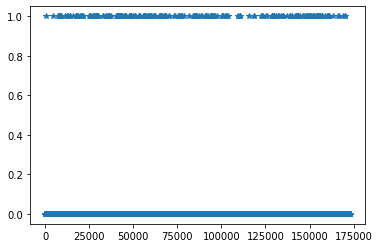

1 column vs result


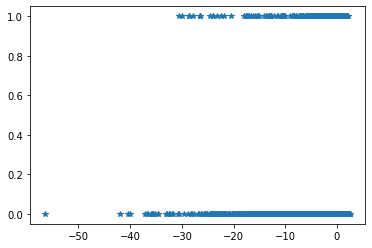

2 column vs result


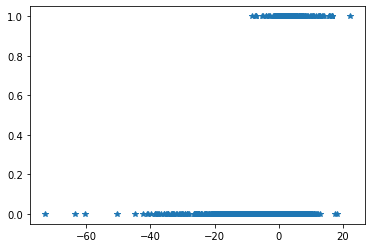

3 column vs result


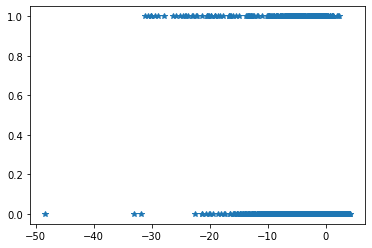

4 column vs result


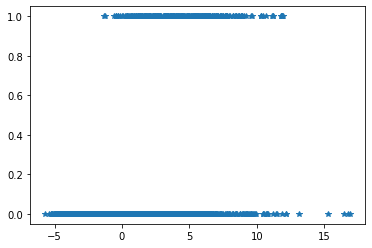

5 column vs result


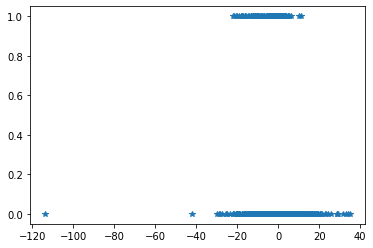

6 column vs result


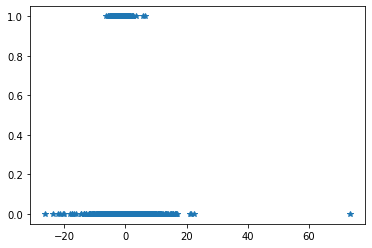

7 column vs result


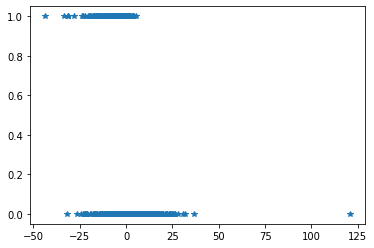

8 column vs result


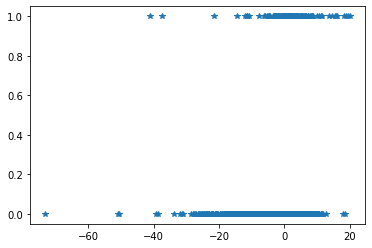

9 column vs result


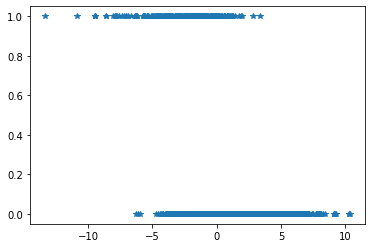

10 column vs result


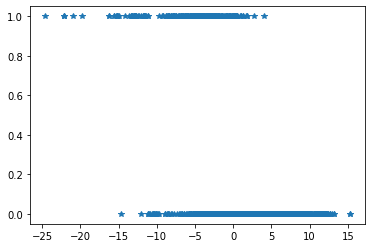

11 column vs result


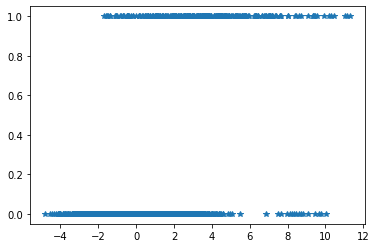

12 column vs result


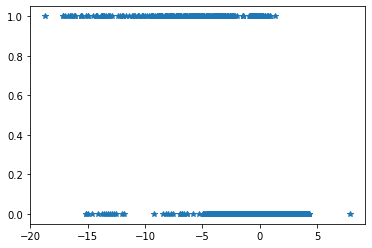

13 column vs result


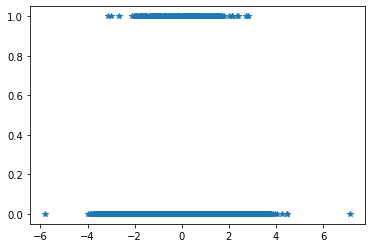

14 column vs result


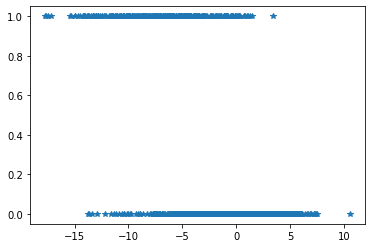

15 column vs result


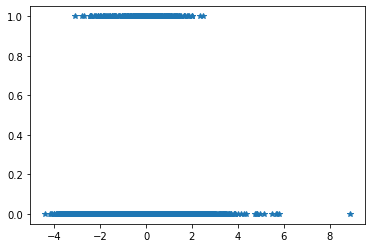

16 column vs result


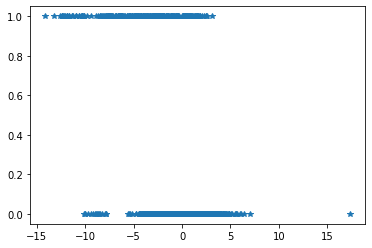

17 column vs result


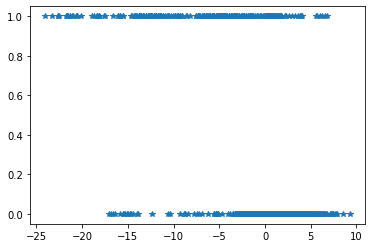

18 column vs result


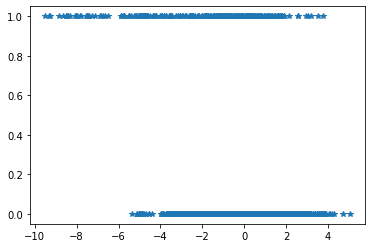

19 column vs result


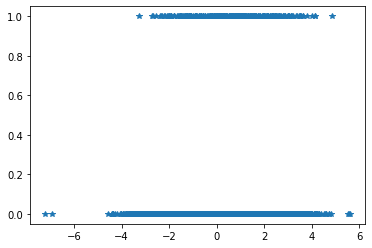

20 column vs result


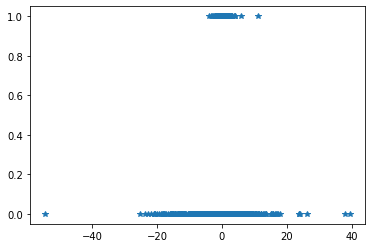

21 column vs result


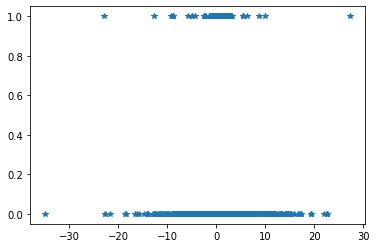

22 column vs result


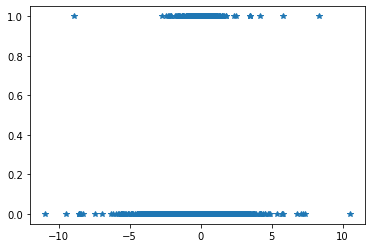

23 column vs result


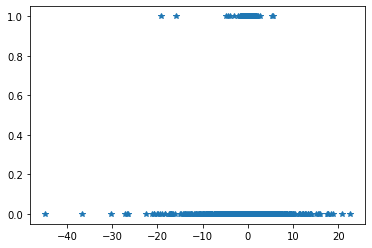

24 column vs result


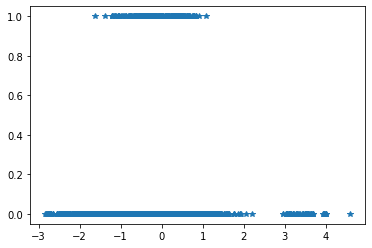

25 column vs result


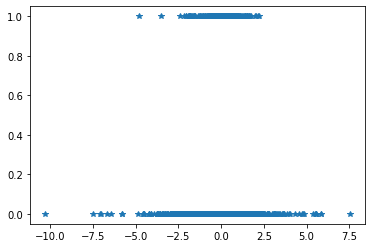

26 column vs result


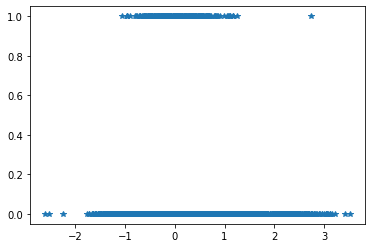

27 column vs result


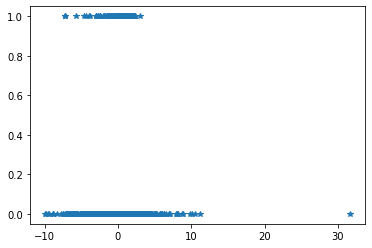

28 column vs result


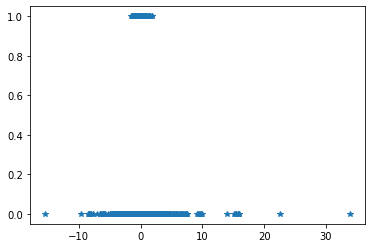

29 column vs result


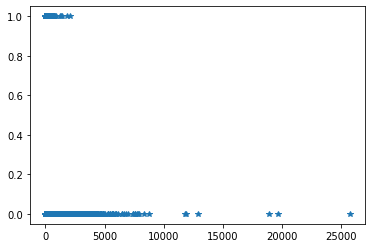

In [0]:
for i in range(30):
  print(str(i)+" column vs result")
  plt.plot(X_train[:,i],y_train,'*')
  plt.show()


#CONVENTIONAL MACHINE LEARNiNG METHOD(SVM)

In [0]:
from sklearn import svm 

In [0]:
svc = svm.SVC(decision_function_shape='ovo')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svc_predictions=svc.predict(X_test)
svc_predictions.reshape(-1,1)
accuracy=svc.score(X_test,y_test)*100

In [0]:
accuracy

99.8323428982734

In [0]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, svc_predictions) 

In [0]:
cm

array([[113732,      0],
       [   191,      0]])

In [0]:
svc_predictions.shape

(113923,)

In [0]:
a=y_test.shape

In [0]:
sum2=0
for i in range(svc_predictions.shape[0]):
  sum2=sum2+((svc_predictions[i]-y_test[i])**2)
test_error = (sum2/a)*100

In [0]:
test_error

array([0.1676571])

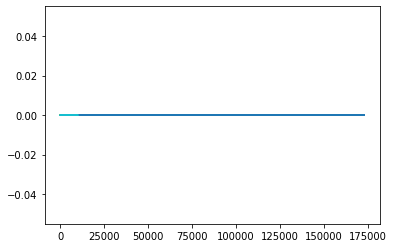

In [0]:
plt.plot(X_test,svc_predictions)

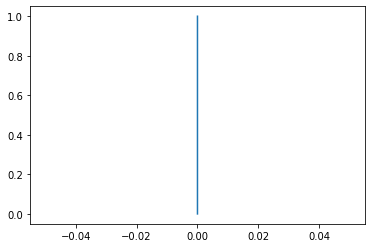

In [0]:
plt.plot(svc_predictions,y_test)

#AUTOENCODERS

In [0]:
from keras import models,layers,regularizers
from keras.optimizers import Adam

In [0]:
X_tra = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
model = models.Sequential()
model.add(layers.CuDNNLSTM(128,return_sequences=True,input_shape = (X_tra.shape[1],X_tra.shape[2]),activity_regularizer=regularizers.l1(0.01),recurrent_regularizer=regularizers.l2(0.01)))
model.add(layers.CuDNNLSTM(128,activity_regularizer=regularizers.l1(0.01),recurrent_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128))
model.add(layers.Dense(1,activation = "linear"))
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])

In [0]:
model.fit(X_tra,y_train,batch_size=64,epochs = 10)

Epoch 1/10
170884/170884 [==============================] - 25s 145us/step - loss: 19.6481 - acc: 0.9982
Epoch 2/10
170884/170884 [==============================] - 23s 137us/step - loss: 7.9255 - acc: 0.9982
Epoch 3/10
170884/170884 [==============================] - 23s 137us/step - loss: 7.7233 - acc: 0.9982
Epoch 4/10
170884/170884 [==============================] - 23s 137us/step - loss: 7.6281 - acc: 0.9982
Epoch 5/10
170884/170884 [==============================] - 23s 137us/step - loss: 7.6254 - acc: 0.9982
Epoch 6/10
170884/170884 [==============================] - 23s 137us/step - loss: 7.6080 - acc: 0.9982
Epoch 7/10
170884/170884 [==============================] - 23s 137us/step - loss: 7.3474 - acc: 0.9982
Epoch 8/10
170884/170884 [==============================] - 23s 138us/step - loss: 6.3089 - acc: 0.9982
Epoch 9/10
170884/170884 [==============================] - 24s 138us/step - loss: 4.6591 - acc: 0.9982
Epoch 10/10
170884/170884 [==============================] - 23

In [0]:
Xt = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
model.evaluate(Xt,y_test)

113923/113923 [==============================] - 12s 103us/step


[1.5088550903853801, 0.998323428982734]

In [0]:
Xt.shape

(113923, 30, 1)

In [0]:
X_test.shape

(113923, 30)

#OTHER DEEP LEARNING APPROACH


In [0]:
Xcnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = models.Sequential()
model.add(layers.Conv1D(filters = 128,kernel_size = 3,strides = 2,padding = 'valid'))
model.add(layers.CuDNNLSTM(128,return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dropout(0.8))
model.add(layers.Dense(128,activation='relu',activity_regularizer=regularizers.l1(1)))
model.add(layers.Dense(128,activation='relu',activity_regularizer=regularizers.l1(1)))
model.add(layers.Dense(1,activation = "linear"))
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])

In [0]:
model.fit(Xcnn,y_train,batch_size=64,epochs = 15)

Epoch 1/15
170884/170884 [==============================] - 18s 106us/step - loss: 23.3052 - acc: 0.9980
Epoch 2/15
170884/170884 [==============================] - 17s 97us/step - loss: 0.0610 - acc: 0.9982
Epoch 3/15
170884/170884 [==============================] - 16s 96us/step - loss: 0.0387 - acc: 0.9982
Epoch 4/15
170884/170884 [==============================] - 16s 96us/step - loss: 0.0363 - acc: 0.9982
Epoch 5/15
170884/170884 [==============================] - 16s 96us/step - loss: 0.0317 - acc: 0.9982
Epoch 6/15
170884/170884 [==============================] - 16s 96us/step - loss: 0.0363 - acc: 0.9982
Epoch 7/15
170884/170884 [==============================] - 17s 97us/step - loss: 0.0314 - acc: 0.9982
Epoch 8/15
170884/170884 [==============================] - 17s 97us/step - loss: 0.0301 - acc: 0.9982
Epoch 9/15
170884/170884 [==============================] - 16s 96us/step - loss: 0.0298 - acc: 0.9982
Epoch 10/15
170884/170884 [==============================] - 16s 96us/s

In [0]:
X_cnnt = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
model.evaluate(X_cnnt,y_test)

113923/113923 [==============================] - 9s 81us/step


[0.027023229419734184, 0.998323428982734]